# **Adaptacja tensorflow ResNet50 do architektury Fully Convolutional Network**


Wyjsciowa sieć ResNet50 zbudowana jest z :
- 48 warstw CNN
- 1 warstwy MaxPool
- 1 warstwy AveragePool

**Ogólna struktura**
- Wejście sieci to 64 filtry o rozmoiarze 7x7, do któej jest wprowadzany obraz po uzupełnieniu o 3 pixele z każdej strony
- Pojedyńczy blok sieci zbudowany jest z
> - podstawowego stosu trzech warstw CNN o liczbie filtróe N, N, 4N i rozmiarach filtróe  1x1, 3x3, 1x1
> - połączenia bottleneck, z konwolucją 1x1

- __[Oryginalny artykuł architektury ResNet:](https://arxiv.org/pdf/1512.03385.pdf)__
- __[Dobry opis ResNet50:](https://datagen.tech/guides/computer-vision/resnet-50/)__

**Adaptacja do Fully Convolutional Network**:
- ostatnia warstwa jest musi być również warstwą konwolucyjną,
> - liczba filtrów taka jak liczba klas ResNet50 (1000)
> - kernel 1x1

**Interesujące linki**:
- __[trening ResNet from scratch](https://towardsdatasciencecom/hands-on-tensorflow-tutorial-train-resnet-50-from-scratch-using-the-imagenet-dataset-850aa31a39c0)__

In [2]:
BASE_PATH = "/mnt/workdata/_WORK_/FCN_architecture/TF_ResNet50/"

In [3]:
import sys
import os
sys.path.insert(0, BASE_PATH)
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

import numpy as np
import tensorflow as tf

# this is the workaround for Pycharm/tensorflow cooperation
keras = tf.keras
from keras.applications.resnet import preprocess_input

from matplotlib import pyplot as plt
%matplotlib inline

import cv2
from TF_ResNet_based_FCN import build_fully_convolutional_resnet50

import pandas as pd
from tabulate import tabulate

from TF_ResNet_based_FCN import get_prediction

print(sys.version)
for m in [cv2, tf, np]:
    print(f"{m.__name__:15s}\t{m.__version__}")

3.8.15 (default, Oct 12 2022, 19:14:39) 
[GCC 7.5.0]
cv2            	4.7.0
tensorflow     	2.9.2
numpy          	1.24.2


In [4]:
BASE_WEIGHTS_PATH = ("file:///mnt/Data2/vision_models/TF_ResNet_50/")
WEIGHTS_HASHES = {"resnet50": "4d473c1dd8becc155b73f8504c6f6626"}
BASE_IMAGE_PATH = os.path.join(BASE_PATH, "obrazy")
LABELS_FILEPATH = os.path.join(BASE_PATH, "imagenet_classes.txt")

In [10]:
# read stroed images
imagelist = [x for x in os.listdir(BASE_IMAGE_PATH) if x.endswith("jpg")]
images={}
for img_file in imagelist:
    img = cv2.cvtColor(cv2.imread(os.path.join(BASE_IMAGE_PATH, img_file)), cv2.COLOR_BGR2RGB)
    img_prepared = preprocess_input(img)
    images[img_file] = {
        'img_filepath': os.path.join(BASE_IMAGE_PATH, img_file),
        'img' : img,
        'img_p': img_prepared
    }

# read ImageNet class ids
with open(LABELS_FILEPATH) as f:
    labels = [line.strip() for line in f.readlines()]

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of d so we will re-download the data.
94773248/94765736 [==============================] - 0s 0us/step


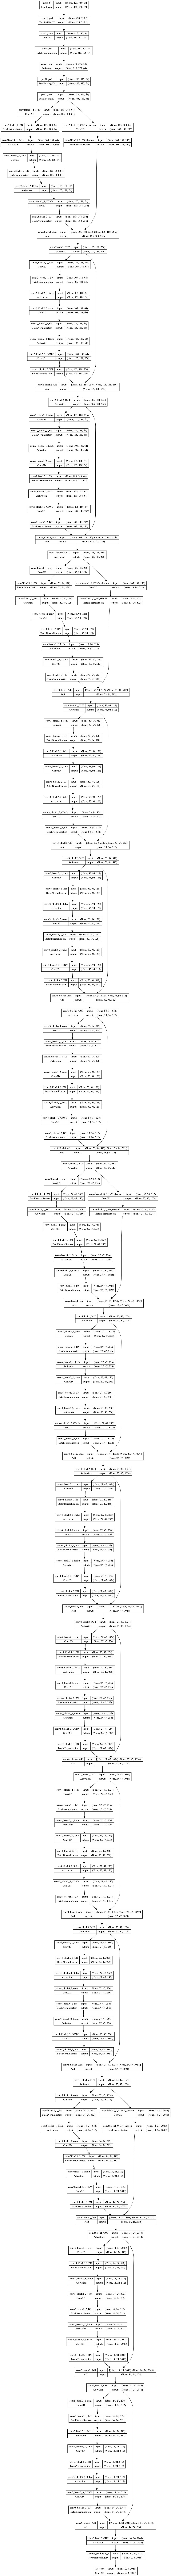

In [11]:
# create and initialize model with first image
org_img=images[list(images.keys())[0]]['img_p']
org_img = tf.expand_dims(org_img, 0)
model = build_fully_convolutional_resnet50(
    input_shape=(org_img.shape[-3:]),
    base_weights_path=BASE_WEIGHTS_PATH,
    weights_hashes=WEIGHTS_HASHES
)
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True,
                          to_file=os.path.join(BASE_PATH, 'FCN-ResNet50.png'))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


szympans.jpg        	: 420 x 750


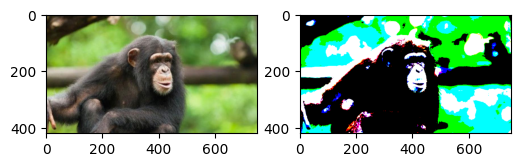

1/1 [==============================] - 0s 20ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Predicted class: chimpanzee, chimp, Pan troglodytes

All predicted classes:
      label index    occurences    max probability  object
--  -------------  ------------  -----------------  ----------------------------------
 1            367             4          0.950639   chimpanzee, chimp, Pan troglodytes
 2            370             1          0.0782626  guenon, guenon monkey
 0            316             1          0.0295125  cicada, cicala




zebra-1.jpg         	: 506 x 700


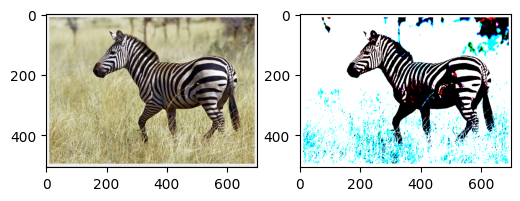

1/1 [==============================] - 0s 21ms/step
Predicted class: zebra

All predicted classes:
      label index    occurences    max probability  object
--  -------------  ------------  -----------------  --------
 1            340             5           0.900485  zebra
 0            138             1           0.123064  bustard




wiewiorka_2.jpg     	: 201 x 251


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


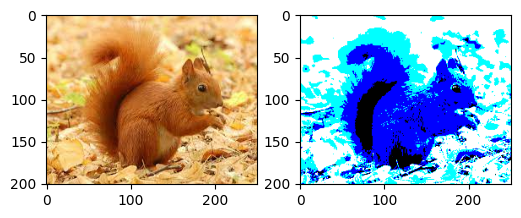

1/1 [==============================] - 0s 19ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Predicted class: fox squirrel, eastern fox squirrel, Sciurus niger

All predicted classes:
      label index    occurences    max probability  object
--  -------------  ------------  -----------------  -------------------------------------------------
 0            335             1            0.99943  fox squirrel, eastern fox squirrel, Sciurus niger




antylopa.jpg        	: 418 x 583


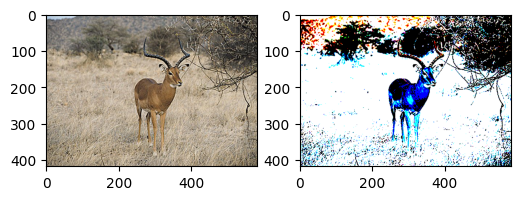

1/1 [==============================] - 0s 20ms/step
Predicted class: impala, Aepyceros melampus

All predicted classes:
      label index    occurences    max probability  object
--  -------------  ------------  -----------------  --------------------------
 2            352             1           0.935393  impala, Aepyceros melampus
 1            351             2           0.406911  hartebeest
 0            138             1           0.122302  bustard




kobra.jpg           	: 853 x 1280


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


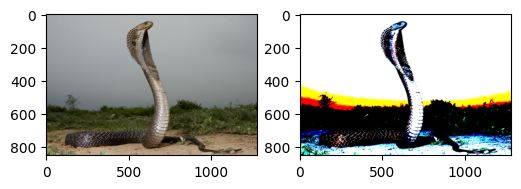

1/1 [==============================] - 0s 24ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Predicted class: Indian cobra, Naja naja

All predicted classes:
      label index    occurences    max probability  object
--  -------------  ------------  -----------------  --------------------------------------------
 0             63             4          0.999817   Indian cobra, Naja naja
 6            908             1          0.522175   wing
 4            844             2          0.370576   switch, electric switch, electrical switch
 3            783             1          0.368532   screw
 2            534             3          0.315079   dishwasher, dish washer, dishwashing machine
 1            127             1          0.185659   white stork, Ciconia ciconia
 7            975             2          0.137783   lakeside, lakeshore
 5            892             1          0.0779888  wall clock




wiewiorka__1.jpg    	: 536 x 800


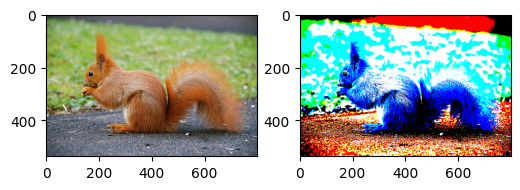

1/1 [==============================] - 0s 23ms/step
Predicted class: fox squirrel, eastern fox squirrel, Sciurus niger

All predicted classes:
      label index    occurences    max probability  object
--  -------------  ------------  -----------------  -------------------------------------------------
 2            335             4          0.992343   fox squirrel, eastern fox squirrel, Sciurus niger
 0            134             1          0.0326069  crane
 1            274             1          0.0187876  dhole, Cuon alpinus




goryl.jpg           	: 870 x 1024


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


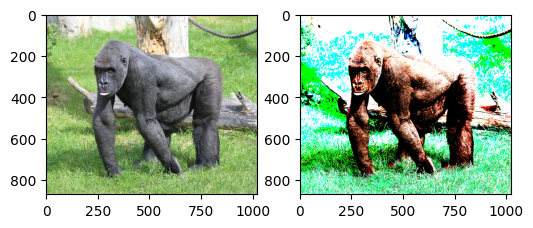

1/1 [==============================] - 0s 22ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Predicted class: gorilla, Gorilla gorilla

All predicted classes:
      label index    occurences    max probability  object
--  -------------  ------------  -----------------  ---------------------------------------------------------
 6            366             6          0.963891   gorilla, Gorilla gorilla
 7            367             1          0.280005   chimpanzee, chimp, Pan troglodytes
 5            297             2          0.135721   sloth bear, Melursus ursinus, Ursus ursinus
 2            197             1          0.133275   giant schnauzer
 1            179             1          0.0786289  Staffordshire bullterrier, Staffordshire bull terrier
 3            223             2          0.0717041  schipperke
 8            912             1          0.0567684  worm fence, snake fence, snake-rail fence, Virginia fence
 4            274             1          0.0442365  dhole, Cuon alpinus
 0              8             1          0.0199332  hen




slon_1.jpg          	: 667

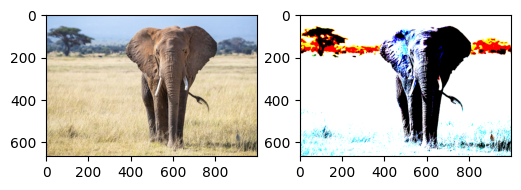

1/1 [==============================] - 0s 25ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Predicted class: African elephant, Loxodonta africana

All predicted classes:
      label index    occurences    max probability  object
--  -------------  ------------  -----------------  ------------------------------------
 3            386             4           0.889286  African elephant, Loxodonta africana
 2            385             1           0.495688  Indian elephant, Elephas maximus
 1            351             5           0.348945  hartebeest
 0            138             2           0.258897  bustard




zyrafa.jpg          	: 353 x 563


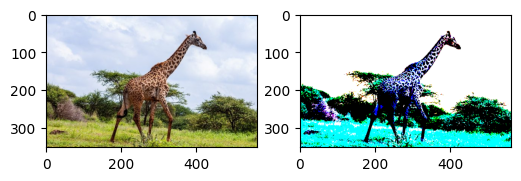

1/1 [==============================] - 0s 19ms/step
Predicted class: cheetah, chetah, Acinonyx jubatus

All predicted classes:
      label index    occurences    max probability  object
--  -------------  ------------  -----------------  ---------------------------------
 0            293             1          0.335116   cheetah, chetah, Acinonyx jubatus
 1            557             1          0.0463126  flagpole, flagstaff




camel.jpg           	: 725 x 1920


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


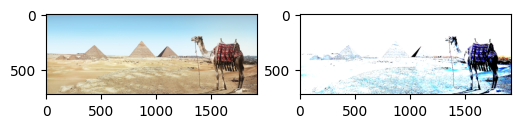

1/1 [==============================] - 0s 27ms/step
Predicted class: Arabian camel, dromedary, Camelus dromedarius

All predicted classes:
      label index    occurences    max probability  object
--  -------------  ------------  -----------------  ---------------------------------------------
 1            354             9          0.999272   Arabian camel, dromedary, Camelus dromedarius
 5            977             4          0.802332   sandbar, sand bar
 3            735             1          0.595869   poncho
 6            978             4          0.568946   seashore, coast, seacoast, sea-coast
 0            273             1          0.108628   dingo, warrigal, warragal, Canis dingo
 2            437             4          0.0563588  beacon, lighthouse, beacon light, pharos
 4            975             1          0.0328592  lakeside, lakeshore






In [19]:
for img_name in images.keys():
    print(f"{img_name:20s}\t: {images[img_name]['img'].shape[0]} x {images[img_name]['img'].shape[1]}")
    fig, ax=plt.subplots(1,2,figsize=(6,4))
    img_prepared = images[img_name]['img_p']
    img_org = images[img_name]['img']
    ax[0].imshow(img_org, resample=True)
    ax[1].imshow(img_prepared, resample=True)
    plt.show()
    prediction=model.predict(tf.expand_dims(img_prepared, 0))
    predicted_class, all_predicted_classess = get_prediction(prediction=prediction, labels=labels)
    print(f'Predicted class: {predicted_class}\n')
    print('All classes present in prediction tensor:')
    print(tabulate(all_predicted_classess, headers='keys'))
    print('\n\n\n')